**1. Load CIFAR -10 Database**

In [ ]:
import keras
from keras.datasets import cifar10

**2. Load the Pre-shuffled train and test data**

In [ ]:
(x_train, y_train),(x_test, y_test)=cifar10.load_data()
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 1)
(10000, 1)


**3. Import**

In [ ]:
from google.colab.patches import cv2_imshow
import cv2, os, json, random
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.cm as cm

%matplotlib inline

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping,ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

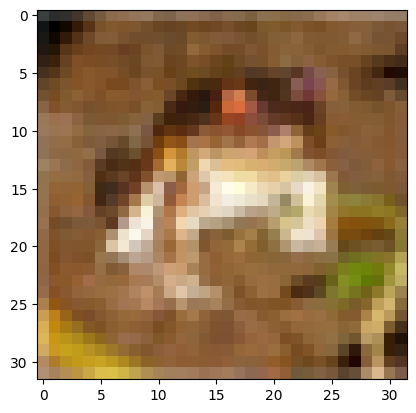

In [ ]:
plt.imshow(x_train[0], cmap=cm.gray)
plt.show()

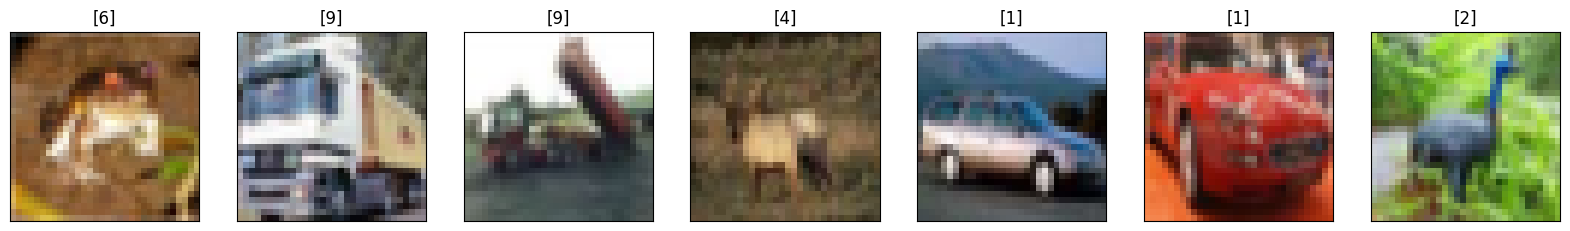

In [ ]:
fig = plt.figure(figsize=(20,20))
for i in range(7):
  ax= fig.add_subplot(1, 7, i+1, xticks=[], yticks=[])
  ax.imshow(x_train[i], cmap='gray')
  ax.set_title(str(y_train[i]))

In [ ]:
x_train=x_train.astype('float32')/255
x_test=x_test.astype('float32')/255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [ ]:
x_train[0].max()

np.float32(1.0)

In [ ]:
x_train[3].min()

np.float32(0.015686275)

In [ ]:
x_train[3].max()

np.float32(0.91764706)

In [ ]:
x_train[1].min()

np.float32(0.019607844)

In [ ]:
x_train.shape

(50000, 32, 32, 3)

In [ ]:
y_train.shape

(50000, 1)

In [ ]:
y_train.ndim

2

In [ ]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [ ]:
x_train.ndim

4

In [ ]:
num_classes = 10
y_train = to_categorical(y_train,num_classes)
y_test = to_categorical(y_test,num_classes)

In [ ]:
y_train.shape

(50000, 10)

In [ ]:
y_test.shape

(10000, 10)

In [ ]:
x_train.shape

(50000, 32, 32, 3)

In [ ]:
x_test.shape

(10000, 32, 32, 3)

In [ ]:
x_train_, x_val_, y_train_, y_val_ = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

In [ ]:
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
datagen.fit(x_train_)

In [ ]:
model = Sequential()

model.add(Conv2D(30, (3,3), padding='same', activation='relu', input_shape=(32,32,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 30)     │           840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 30)     │           120 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 30)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 16, 64)     │        17,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 356,490 (1.36 MB)

 Trainable params: 356,046 (1.36 MB)

 Non-trainable params: 444 (1.73 KB)

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
checkpoint = ModelCheckpoint('model.best.keras', save_best_only=True, verbose=1)
early_stop = EarlyStopping(monitor='val_loss', patience=5, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)

In [ ]:
history = model.fit(datagen.flow(x_train, y_train, batch_size=64),epochs=25,validation_data=(x_val_, y_val_),callbacks=[checkpoint, early_stop, reduce_lr], verbose=2)

Epoch 1/25


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()



Epoch 1: val_loss improved from inf to 1.38527, saving model to model.best.keras
782/782 - 190s - 243ms/step - accuracy: 0.3665 - loss: 1.7548 - val_accuracy: 0.5099 - val_loss: 1.3853 - learning_rate: 1.0000e-03
Epoch 2/25

Epoch 2: val_loss improved from 1.38527 to 1.16988, saving model to model.best.keras
782/782 - 182s - 232ms/step - accuracy: 0.4937 - loss: 1.4140 - val_accuracy: 0.5793 - val_loss: 1.1699 - learning_rate: 1.0000e-03
Epoch 3/25

Epoch 3: val_loss improved from 1.16988 to 1.01413, saving model to model.best.keras
782/782 - 202s - 258ms/step - accuracy: 0.5506 - loss: 1.2693 - val_accuracy: 0.6332 - val_loss: 1.0141 - learning_rate: 1.0000e-03
Epoch 4/25

Epoch 4: val_loss improved from 1.01413 to 0.99857, saving model to model.best.keras
782/782 - 181s - 231ms/step - accuracy: 0.5881 - loss: 1.1715 - val_accuracy: 0.6490 - val_loss: 0.9986 - learning_rate: 1.0000e-03
Epoch 5/25

Epoch 5: val_loss improved from 0.99857 to 0.94883, saving model to model.best.keras
78

In [ ]:
loss, accuracy = model.evaluate(x_test,y_test,verbose=0)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

Test loss: 0.6548871994018555
Test accuracy: 0.7903000116348267


313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step


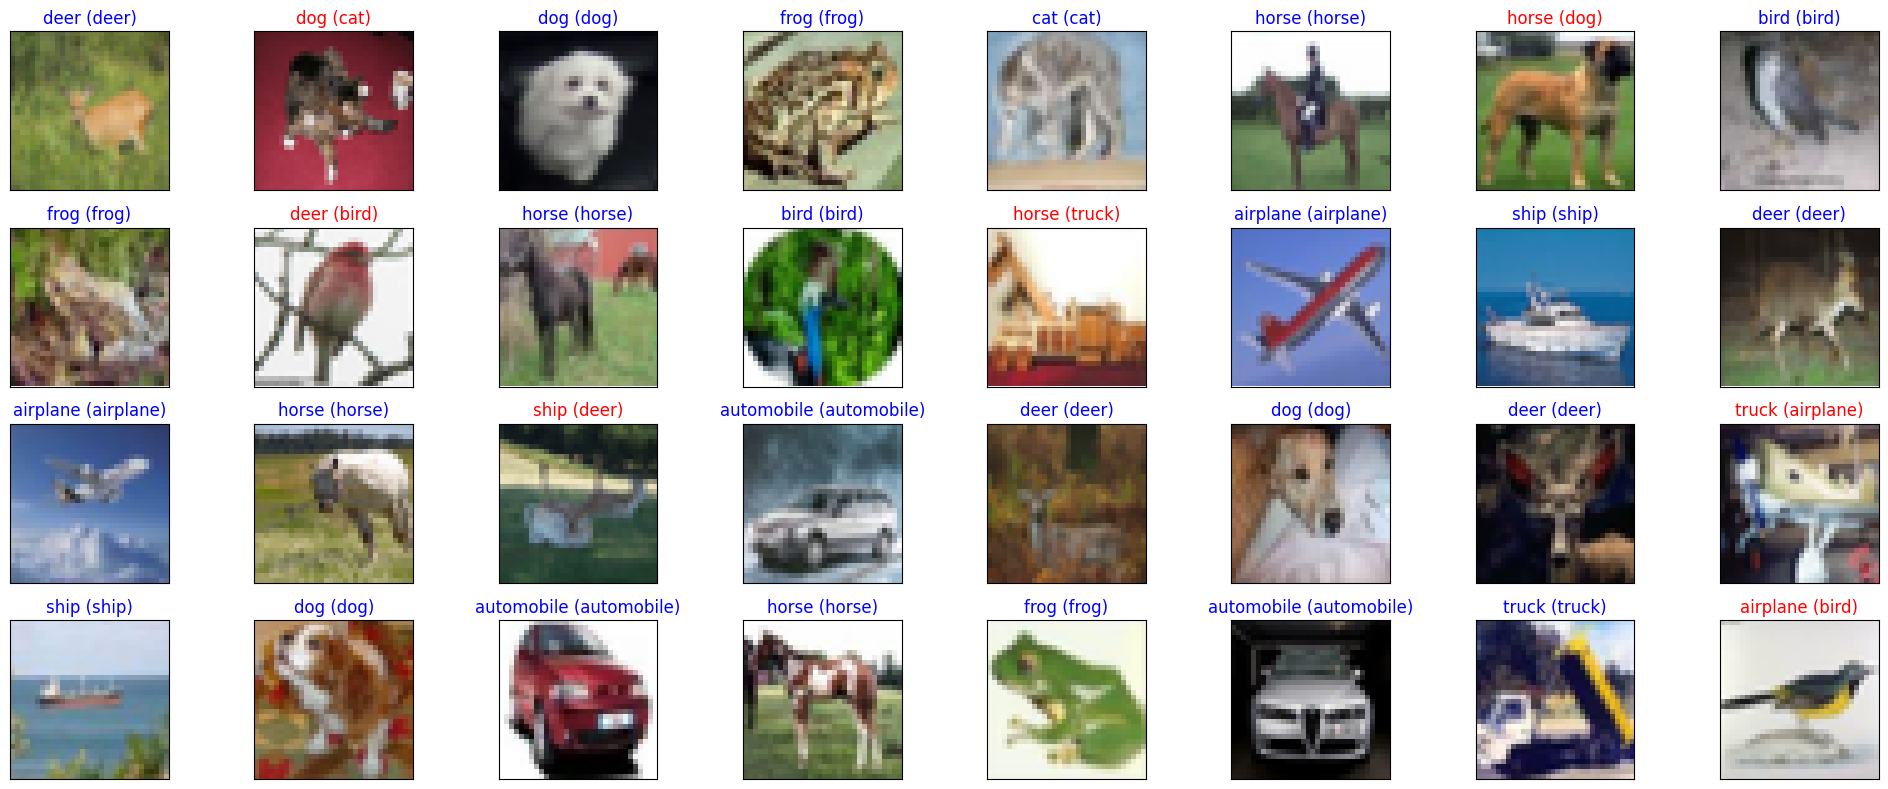

In [ ]:
# Run predictions
y_hat = model.predict(x_test)

# CIFAR-10 label names
cifar10_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

fig = plt.figure(figsize=(20, 8))
for i, idx in enumerate(np.random.choice(x_test.shape[0], size=32, replace=False)):
    ax = fig.add_subplot(4, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(x_test[idx])
    pred_idx = np.argmax(y_hat[idx])
    true_idx = np.argmax(y_test[idx]) if y_test.ndim == 2 else y_test[idx]
    ax.set_title("{} ({})".format(cifar10_labels[pred_idx], cifar10_labels[true_idx]),color=("blue" if pred_idx == true_idx else "red") )

plt.tight_layout()
plt.show()

In [ ]:
from  google.colab.patches import cv2_imshow
import cv2,os,json,random

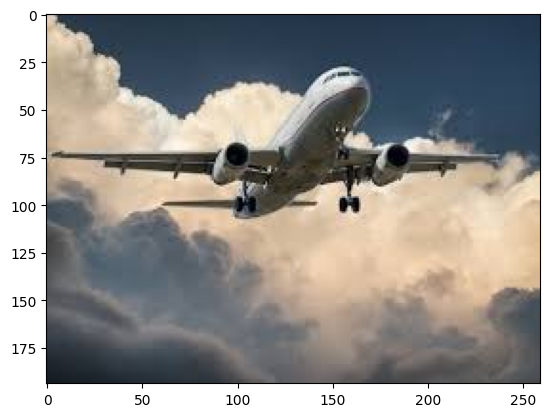

In [ ]:
aer_img =mpimg.imread('/content/aeroplane.jpg')
plt.imshow(aer_img)

In [ ]:
aer_img.shape

(194, 259, 3)

In [ ]:
aer_img.max()

np.uint8(255)

In [ ]:
aer_img=aer_img.astype('float32')/255

In [ ]:
aer_img.shape

(194, 259, 3)

In [ ]:
aer_img.max()

np.float32(1.0)

In [ ]:
aer_img.min()

np.float32(0.0)

In [ ]:
resize_aer=cv2.resize(aer_img,(32,32))
resize_aer.shape

(32, 32, 3)

In [ ]:
pred_aer=model.predict(resize_aer.reshape(1,32,32,3))
pred_aer

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


array([[9.9948251e-01, 7.8978301e-05, 1.2310328e-04, 1.0276148e-05,
        2.1320815e-05, 9.6571250e-07, 1.9937376e-08, 8.4055728e-06,
        1.4042207e-04, 1.3401672e-04]], dtype=float32)

In [ ]:
cifar10_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer',
                  'dog', 'frog', 'horse', 'ship', 'truck']

predicted_class = np.argmax(pred_aer)

print("Predicted label:", cifar10_labels[predicted_class])

Predicted label: airplane


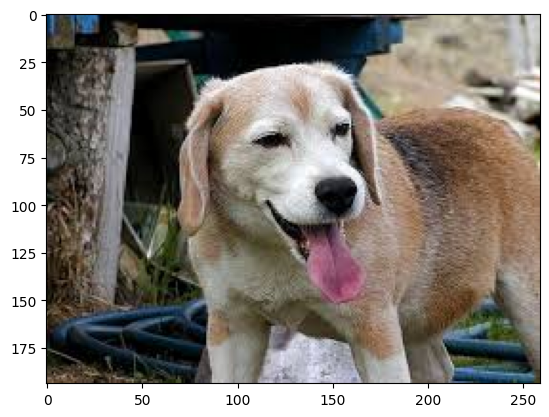

In [ ]:
dog_img =mpimg.imread('/content/dog.jpg')
plt.imshow(dog_img)

In [ ]:
dog_img.shape

(194, 259, 3)

In [ ]:
dog_img.max()

np.uint8(255)

In [ ]:
dog_img=dog_img.astype('float32')/255

In [ ]:
dog_img.shape

(194, 259, 3)

In [ ]:
dog_img.max()

np.float32(1.0)

In [ ]:
dog_img.min()

np.float32(0.0)

In [ ]:
resize_dog=cv2.resize(dog_img,(32,32))
resize_dog.shape

(32, 32, 3)

In [ ]:
pred_dog=model.predict(resize_dog.reshape(1,32,32,3))
pred_dog

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


array([[5.4315949e-04, 1.5950801e-02, 1.5086575e-01, 3.2582872e-02,
        2.9923089e-02, 1.6770211e-01, 1.4043202e-01, 3.3388782e-01,
        3.2876508e-04, 1.2778366e-01]], dtype=float32)

In [ ]:
cifar10_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer',
                  'dog', 'frog', 'horse', 'ship', 'truck']

predicted_class = np.argmax(pred_dog)

print("Predicted label:", cifar10_labels[predicted_class])

Predicted label: horse


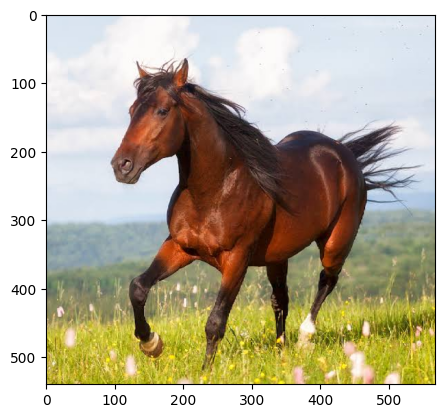

In [ ]:
horse_img =mpimg.imread('/content/horse.jpg')
plt.imshow(horse_img)

In [ ]:
horse_img.shape

(540, 568, 3)

In [ ]:
horse_img.max()

np.uint8(255)

In [ ]:
horse_img=horse_img.astype('float32')/255

In [ ]:
horse_img.shape

(540, 568, 3)

In [ ]:
horse_img.max()

np.float32(1.0)

In [ ]:
horse_img.min()

np.float32(0.0)

In [ ]:
resize_horse=cv2.resize(horse_img,(32,32))
resize_horse.shape

(32, 32, 3)

In [ ]:
pred_horse=model.predict(resize_horse.reshape(1,32,32,3))
pred_horse

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


array([[4.3971675e-09, 8.7464900e-14, 4.9605706e-08, 1.3717266e-09,
        2.2415956e-05, 3.8628878e-06, 2.2144678e-11, 9.9997377e-01,
        1.5269653e-13, 7.3029994e-12]], dtype=float32)

In [ ]:
cifar10_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer',
                  'dog', 'frog', 'horse', 'ship', 'truck']

predicted_class = np.argmax(pred_horse)

print("Predicted label:", cifar10_labels[predicted_class])

Predicted label: horse
